### Задание 1.

Решите задачу распознавания лиц с помощью SVM с ядром. Попробуйте различные ядра: 'poly', 'rbf', 'sigmoid'.

Подберите гиперпараметры по кросс-валидации. 

SVM с каким ядром дал лучший результат?

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, confusion_matrix
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [92]:
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Junichiro Koizumi' 'Tony Blair']
(1277, 62, 47)


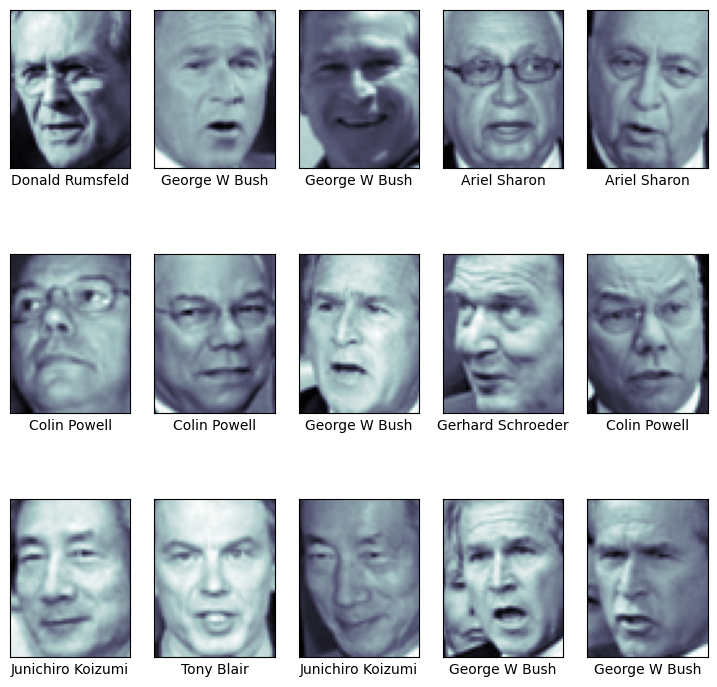

In [93]:
fig, ax = plt.subplots(3, 5, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [94]:
pca = PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=42) # PCA для уменьшения размерности

In [95]:
# Настройка модели SVM с poly ядром
svc_poly = SVC(kernel='poly')
model_poly = make_pipeline(pca, svc_poly)

In [96]:
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42) # разделение данных на тренировочную и тестовую выборки

In [97]:
# Подбор гиперпараметров
param_grid_poly = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__degree': [2, 3, 4], 
    'svc__gamma': ['scale', 'auto'],  
    'svc__coef0': [0, 0.5, 1, 10]  
}
grid_poly = GridSearchCV(model_poly, param_grid_poly, n_jobs=-1)
grid_poly.fit(Xtrain, ytrain)

print(grid_poly.best_params_)

{'svc__C': 1, 'svc__coef0': 1, 'svc__degree': 2, 'svc__gamma': 'auto'}


In [98]:
model = grid_poly.best_estimator_
yfit = model.predict(Xtest)

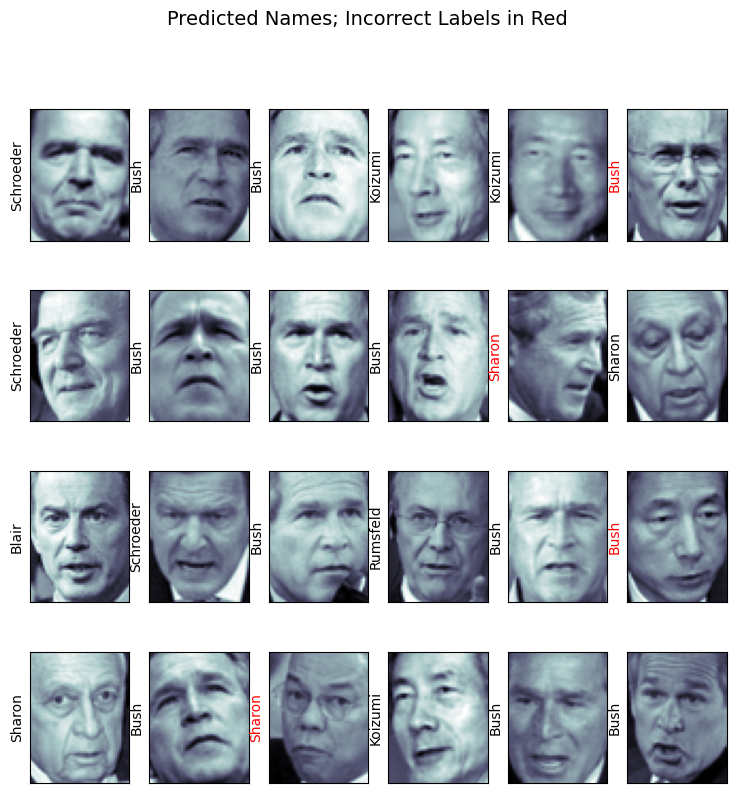

In [99]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [100]:
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.56      0.69      0.62        13
     Colin Powell       0.86      0.83      0.85        66
  Donald Rumsfeld       0.81      0.57      0.67        30
    George W Bush       0.84      0.94      0.88       139
Gerhard Schroeder       0.90      0.79      0.84        24
Junichiro Koizumi       0.88      0.88      0.88        17
       Tony Blair       0.92      0.77      0.84        31

         accuracy                           0.84       320
        macro avg       0.83      0.78      0.80       320
     weighted avg       0.84      0.84      0.84       320



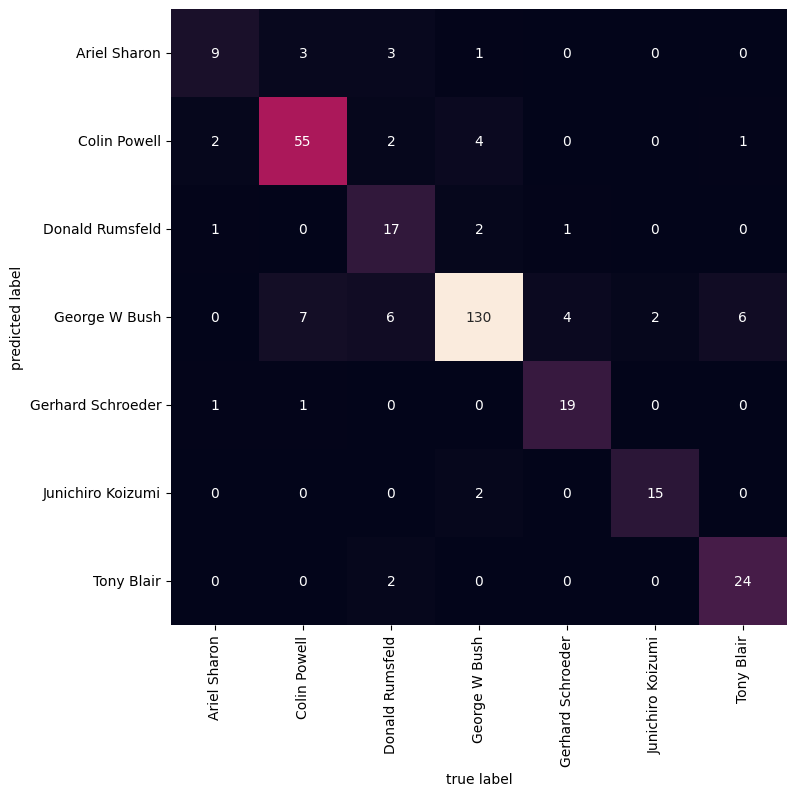

In [101]:
plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [102]:
accuracy_score(yfit, ytest)

0.840625

In [103]:
# Настройка модели SVM с RBF ядром
svc_rbf = SVC(kernel='rbf')
model_rbf = make_pipeline(pca, svc_rbf)

# Подбор гиперпараметров
param_grid_rbf = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto', 0.001, 0.0001],
}

grid_rbf = GridSearchCV(model_rbf, param_grid_rbf, n_jobs=-1)
grid_rbf.fit(Xtrain, ytrain)

print(grid_rbf.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


In [104]:
model = grid_rbf.best_estimator_
yfit = model.predict(Xtest)

print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

print(f"Точность на тестовой выборке: {accuracy_score(yfit, ytest)}")

                   precision    recall  f1-score   support

     Ariel Sharon       0.50      0.46      0.48        13
     Colin Powell       0.77      0.77      0.77        66
  Donald Rumsfeld       0.83      0.63      0.72        30
    George W Bush       0.84      0.94      0.89       139
Gerhard Schroeder       0.85      0.71      0.77        24
Junichiro Koizumi       0.94      0.94      0.94        17
       Tony Blair       0.96      0.81      0.88        31

         accuracy                           0.83       320
        macro avg       0.81      0.75      0.78       320
     weighted avg       0.83      0.83      0.82       320

Точность на тестовой выборке: 0.828125


In [105]:
# Настройка модели SVM с sigmoid ядром
svc_sigmoid = SVC(kernel='sigmoid')
model_sigmoid = make_pipeline(pca, svc_sigmoid)

# Подбор гиперпараметров
param_grid_sigmoid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto', 0.001, 0.0001],
    'svc__coef0': [0, 0.5, 1, 10]
}

grid_sigmoid = GridSearchCV(model_sigmoid, param_grid_sigmoid, n_jobs=-1)
grid_sigmoid.fit(Xtrain, ytrain)

print(grid_sigmoid.best_params_)

{'svc__C': 100, 'svc__coef0': 0, 'svc__gamma': 0.0001}


In [106]:
model = grid_sigmoid.best_estimator_
yfit = model.predict(Xtest)

print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

print(f"Точность на тестовой выборке: {accuracy_score(yfit, ytest)}")

                   precision    recall  f1-score   support

     Ariel Sharon       0.55      0.46      0.50        13
     Colin Powell       0.77      0.76      0.76        66
  Donald Rumsfeld       0.79      0.63      0.70        30
    George W Bush       0.80      0.94      0.86       139
Gerhard Schroeder       0.86      0.75      0.80        24
Junichiro Koizumi       0.87      0.76      0.81        17
       Tony Blair       1.00      0.68      0.81        31

         accuracy                           0.80       320
        macro avg       0.80      0.71      0.75       320
     weighted avg       0.81      0.80      0.80       320

Точность на тестовой выборке: 0.803125


SVM с полиномиальным ядром (poly) показал лучшие результаты с точностью 0.840625 на тестовой выборке. Он превосходит ядра rbf и sigmoid по показателям precision, recall и f1-score для большинства классов. 

### Задание 2.

Решите задачу распознавания лиц с помощью логистической регрессии (она также поддерживает опцию class_weight='balanced'):

1) Объявите модель, состоящую из pipeline(pca,logistic regression)

2) Подберите по сетке параметр C логистической регрессии (с помощью GridSearch)

3) Обучите модель на тренировочных данных и выведите наилучшие параметры модели

Какое качество показала эта модель?

In [115]:
from sklearn.linear_model import LogisticRegression

faces = fetch_lfw_people(min_faces_per_person=60) # загрузка данных
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42) # разделение данных на тренировочную и тестовую выборки

pca = PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=42) # PCA для уменьшения размерности

lr = LogisticRegression(solver='liblinear', random_state=42) # логистическая регрессия без class_weight='balanced'
model = make_pipeline(pca, lr)

# Подбор гиперпараметров
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(model, param_grid)
grid.fit(Xtrain, ytrain)

grid.best_params_

{'logisticregression__C': 0.1}

In [116]:
model = grid.best_estimator_

# Оценка модели
yfit = model.predict(Xtest)
print(classification_report(ytest, yfit, target_names=faces.target_names))
print("Точность на тестовой выборке:", accuracy_score(ytest, yfit))

                   precision    recall  f1-score   support

     Ariel Sharon       0.56      0.38      0.45        13
     Colin Powell       0.78      0.80      0.79        66
  Donald Rumsfeld       0.79      0.63      0.70        30
    George W Bush       0.84      0.92      0.88       139
Gerhard Schroeder       0.87      0.83      0.85        24
Junichiro Koizumi       0.78      0.82      0.80        17
       Tony Blair       0.92      0.74      0.82        31

         accuracy                           0.82       320
        macro avg       0.79      0.73      0.76       320
     weighted avg       0.82      0.82      0.81       320

Точность на тестовой выборке: 0.81875


In [117]:
lr = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
model = make_pipeline(pca, lr)

# Подбор гиперпараметров
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(model, param_grid)
grid.fit(Xtrain, ytrain)

grid.best_params_

{'logisticregression__C': 0.01}

In [118]:
model = grid.best_estimator_

# Оценка модели
yfit = model.predict(Xtest)
print(classification_report(ytest, yfit, target_names=faces.target_names))
print("Точность на тестовой выборке:", accuracy_score(ytest, yfit))

                   precision    recall  f1-score   support

     Ariel Sharon       0.40      0.46      0.43        13
     Colin Powell       0.77      0.80      0.79        66
  Donald Rumsfeld       0.69      0.67      0.68        30
    George W Bush       0.94      0.86      0.89       139
Gerhard Schroeder       0.78      0.88      0.82        24
Junichiro Koizumi       0.67      0.94      0.78        17
       Tony Blair       0.76      0.71      0.73        31

         accuracy                           0.80       320
        macro avg       0.71      0.76      0.73       320
     weighted avg       0.81      0.80      0.81       320

Точность на тестовой выборке: 0.803125


Модель логистической регрессии **без** class_weight='balanced' показывает немного лучшую общую точность (accuracy) на тестовой выборке (0.81875 против 0.803125). Однако при использовании class_weight='balanced' модель показывает более высокие значения recall для большинства классов, что указывает на лучшее распознавание меньших по размеру классов за счет немного сниженной общей точности.

### Задание 3.

Разбалловка:

- 5 баллов: обучили один алгоритм и погридсерчили
- 10 баллов: попробовали обучить два и более алгоритмов, погридсерчили

Поработайте с датасетом winequalityN (целевая переменная - quality). Поэкспериментируйте с алгоритмами классификации, попробуйте подобрать гиперпараметры для них. 

In [53]:
import pandas as pd

data = pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [54]:
missing_values = data.isnull().sum()  # проверка на наличие пропущенных значений
missing_values[missing_values > 0] 

fixed acidity       10
volatile acidity     8
citric acid          3
residual sugar       2
chlorides            2
pH                   9
sulphates            4
dtype: int64

In [55]:
data.shape

(6497, 13)

In [56]:
data.dropna(inplace=True)
data.shape

(6463, 13)

In [57]:
data['type'] = data['type'].map({'white': 0, 'red': 1})

In [58]:
data['quality'].value_counts()

quality
6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: count, dtype: int64

In [59]:
# объединение редких классов с ближайшими по значению для улучшения баланса
data['quality'] = data['quality'].apply(lambda x: 8 if x == 9 else (4 if x == 3 else x))
print(data['quality'].value_counts())

quality
6    2820
5    2128
7    1074
4     244
8     197
Name: count, dtype: int64


In [60]:
X = data.drop('quality', axis=1)
y = data['quality']

# разделение данных на обучающую и тестовую выборки
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

**LogisticRegression**

In [68]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

param_grid = {'logreg__C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipeline, param_grid)
grid.fit(Xtrain, ytrain)

grid.best_params_

{'logreg__C': 100}

In [69]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

print(classification_report(ytest, yfit))
print("Точность на тестовой выборке:", accuracy_score(ytest, yfit))

              precision    recall  f1-score   support

           4       0.73      0.15      0.25        52
           5       0.61      0.57      0.59       430
           6       0.50      0.70      0.59       540
           7       0.51      0.27      0.35       228
           8       0.00      0.00      0.00        43

    accuracy                           0.54      1293
   macro avg       0.47      0.34      0.36      1293
weighted avg       0.53      0.54      0.51      1293

Точность на тестовой выборке: 0.5382830626450116


d:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
# попробуем добавить class_weight='balanced'
pipeline_balanced = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'))
])

grid = GridSearchCV(pipeline_balanced, param_grid)
grid.fit(Xtrain, ytrain)

grid.best_params_

{'logreg__C': 0.1}

In [76]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

print(classification_report(ytest, yfit))
print("Точность на тестовой выборке:", accuracy_score(ytest, yfit))

              precision    recall  f1-score   support

           4       0.13      0.50      0.21        52
           5       0.60      0.52      0.56       430
           6       0.55      0.22      0.31       540
           7       0.32      0.31      0.31       228
           8       0.11      0.67      0.18        43

    accuracy                           0.36      1293
   macro avg       0.34      0.45      0.31      1293
weighted avg       0.49      0.36      0.39      1293

Точность на тестовой выборке: 0.36272235112142304


Применение class_weight='balanced' значительно снизило общую точность, хотя и позволило модели лучше распознавать менее представленные классы.

**DecisionTreeClassifier**

In [105]:
decision_tree = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Подбор гиперпараметров
grid = GridSearchCV(decision_tree, param_grid)
grid.fit(Xtrain, ytrain)

grid.best_params_

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [106]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

print(classification_report(ytest, yfit))
print("Точность на тестовой выборке:", accuracy_score(ytest, yfit))

              precision    recall  f1-score   support

           4       0.22      0.15      0.18        52
           5       0.64      0.66      0.65       430
           6       0.59      0.59      0.59       540
           7       0.53      0.54      0.53       228
           8       0.28      0.26      0.27        43

    accuracy                           0.57      1293
   macro avg       0.45      0.44      0.44      1293
weighted avg       0.57      0.57      0.57      1293

Точность на тестовой выборке: 0.5738592420726991


In [108]:
# Добавим class_weight='balanced'
decision_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Подбор гиперпараметров
grid = GridSearchCV(decision_tree, param_grid)
grid.fit(Xtrain, ytrain)

grid.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [109]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

print(classification_report(ytest, yfit))
print("Точность на тестовой выборке:", accuracy_score(ytest, yfit))

              precision    recall  f1-score   support

           4       0.32      0.21      0.26        52
           5       0.64      0.62      0.63       430
           6       0.60      0.67      0.63       540
           7       0.56      0.51      0.53       228
           8       0.30      0.26      0.28        43

    accuracy                           0.59      1293
   macro avg       0.48      0.45      0.47      1293
weighted avg       0.59      0.59      0.59      1293

Точность на тестовой выборке: 0.5916473317865429


Балансировка классов улучшила производительность модели по большинству метрик, повысив общую точность с 57.39% до 59.16%. 

**KNeighborsClassifier**

In [114]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# Подбор гиперпараметров
grid = GridSearchCV(pipeline, param_grid)
grid.fit(Xtrain, ytrain)

grid.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 11,
 'knn__weights': 'distance'}

In [31]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

print(classification_report(ytest, yfit))
print("Точность на тестовой выборке:", accuracy_score(ytest, yfit))

              precision    recall  f1-score   support

           4       0.50      0.08      0.13        52
           5       0.71      0.68      0.69       430
           6       0.61      0.72      0.66       540
           7       0.60      0.58      0.59       228
           8       0.72      0.30      0.43        43

    accuracy                           0.64      1293
   macro avg       0.63      0.47      0.50      1293
weighted avg       0.64      0.64      0.63      1293

Точность на тестовой выборке: 0.642691415313225


**SVC**

In [89]:
# RBF ядро
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('svc', SVC(kernel='rbf', random_state=42))  
])

# Подбор гиперпараметров
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto', 0.001, 0.1, 1, 10, 100],
}

grid = GridSearchCV(pipeline, param_grid, n_jobs=-1)
grid.fit(Xtrain, ytrain)

grid.best_params_

{'svc__C': 100, 'svc__gamma': 1}

In [90]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

print(classification_report(ytest, yfit))
print("Точность на тестовой выборке:", accuracy_score(ytest, yfit))

              precision    recall  f1-score   support

           4       0.19      0.06      0.09        52
           5       0.70      0.64      0.67       430
           6       0.59      0.75      0.66       540
           7       0.62      0.50      0.55       228
           8       0.58      0.26      0.35        43

    accuracy                           0.62      1293
   macro avg       0.54      0.44      0.46      1293
weighted avg       0.62      0.62      0.61      1293

Точность на тестовой выборке: 0.6233565351894819


In [92]:
# poly ядро
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('svc', SVC(kernel='poly', random_state=42))  
])

# Подбор гиперпараметров
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__degree': [2, 3, 4], 
    'svc__coef0': [0, 0.5, 1, 10]  
}

grid = GridSearchCV(pipeline, param_grid, n_jobs=-1)
grid.fit(Xtrain, ytrain)

grid.best_params_

{'svc__C': 1, 'svc__coef0': 1, 'svc__degree': 4}

In [93]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

print(classification_report(ytest, yfit))
print("Точность на тестовой выборке:", accuracy_score(ytest, yfit))

              precision    recall  f1-score   support

           4       0.35      0.15      0.21        52
           5       0.64      0.59      0.61       430
           6       0.53      0.73      0.62       540
           7       0.57      0.31      0.40       228
           8       0.50      0.05      0.09        43

    accuracy                           0.56      1293
   macro avg       0.52      0.37      0.39      1293
weighted avg       0.56      0.56      0.54      1293

Точность на тестовой выборке: 0.5638051044083526


В этот раз более высокую точность показал SVC с RBF ядром. 

В целом, лучший показатель точности - около 64% - показал KNeighborsClassifier.